In [72]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.colors as colors
from matplotlib import cm
import scipy.ndimage as img
import scipy.signal as signal
import scipy.stats as stat
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

In [2]:
bks_blank_path = r'/media/mathis/Data/Mathis/blank_ziggy_210908.npy'
bks_evoked_path = r'/media/mathis/Data/Mathis/gaussian_pos4_ziggy_210908.npy'

awak_pattern_path = r'/media/mathis/Data/Mathis/awake_annoted.png'

In [3]:
Bks_blank = np.load(bks_blank_path)
Bks_evoked = np.load(bks_evoked_path)

Vasc_pattern = plt.imread(awak_pattern_path)

In [60]:
N_trials, Nt, Nx, Ny = Bks_evoked.shape

In [75]:
fs = 100 #Hz
pixel_spacing_mm = 0.0566 #mm
pixel_spacing_m = 0.0000566
time = np.array([i/fs for i in range(Nt)]) #s
frames = range(Nt)

In [107]:
trial = np.copy(Bks_evoked[8])

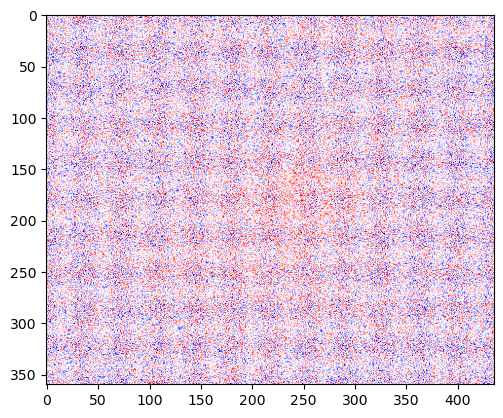

In [8]:
plt.imshow(Bks_evoked[8,26], cmap='seismic', vmax=5, vmin=-5)

In [20]:
Image = np.copy(Bks_evoked[8,26])
mean = np.nanmean(Image)
nan_loc = np.isnan(Image)
Image[nan_loc]= mean

In [12]:
Smooth=img.gaussian_filter(Image, sigma=5, mode='constant')

In [ ]:
Blurred = img.median_filter(Image, size=)

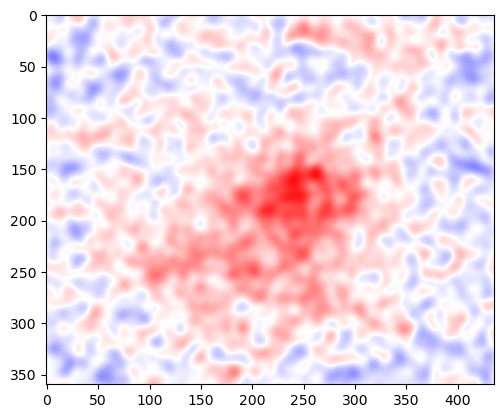

In [14]:
plt.imshow(Smooth, cmap='seismic', vmax=1, vmin=-1)

In [76]:
x,y = np.meshgrid(np.array([pixel_spacing_m*i for i in range(Ny)]), np.array([pixel_spacing_m*i for i in range(Nx)]))
position = np.dstack((x,y))

In [77]:
position[-1,-1]

array([0.024621 , 0.0203194])

In [86]:
data = np.dstack((position,Smooth))

In [87]:
Data = np.reshape(data, (Nx*Ny,3))

In [102]:
km = KMeans(n_clusters=3).fit(np.reshape(Smooth, (Nx*Ny,1)))

In [103]:
Bin = np.reshape(km.labels_, (Nx,Ny))

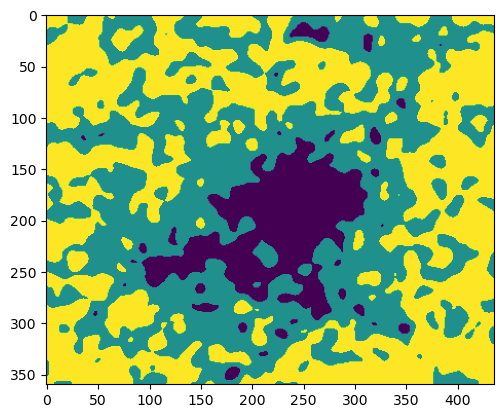

In [104]:
plt.imshow(Bin)

In [108]:
Dt = np.diff(trial, axis=0)

In [109]:
Dt.shape

(59, 360, 436)

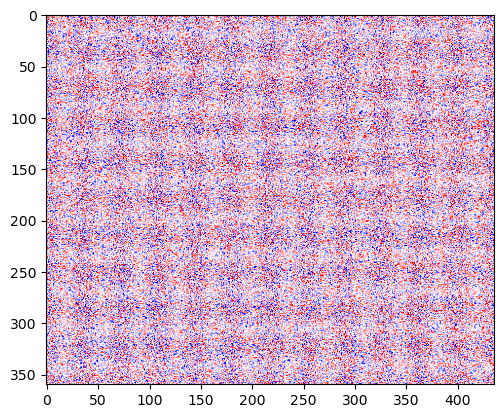

In [112]:
plt.imshow(Dt[24], cmap='seismic', vmax=5, vmin=-5)